<a href="https://colab.research.google.com/github/KarynaSam/Python-DS/blob/main/HW_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Імпорти та завантаження датасету **Текст, выделенный полужирным шрифтом**

In [2]:
import tensorflow as tf
import numpy as np
import albumentations as A

from tensorflow import keras
from tensorflow.keras.callbacks import LambdaCallback, ReduceLROnPlateau

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Input
from keras import optimizers, models, layers, losses, metrics
from keras.applications.vgg16 import VGG16

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.image import resize

import pandas as pd
import matplotlib.pyplot as plt

**Згорткова нейронна мережа**

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/17
1875/1875 [==============================] - 476s 249ms/step - loss: 0.5475 - accuracy: 0.8112 - val_loss: 0.3068 - val_accuracy: 0.8907 - lr: 0.0010
Epoch 2/17
1875/1875 [==============================] - 435s 232ms/step - loss: 0.3443 - accuracy: 0.8804 - val_loss: 0.3089 - val_accuracy: 0.8822 - lr: 0.0010
Epoch 3/17
1875/1875 [==============================] - 430s 230ms/step - loss: 0.3076 - accuracy: 0.8907 - val_loss: 0.2574 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 4/17
1875/1875 [==============================] - 437s 233ms/step - loss: 0.2716 - accuracy: 0.9042 - val_loss: 0.2312 - val_accuracy: 0.9174 - lr: 0.0010
Epoch 5/17
1875/1875 [==============================] - 449s 240ms/step - loss: 0.2551 - accuracy: 0.9094 - val_loss: 0.2228 - val_accuracy: 0.9228 - lr: 0.0010
Epoch 6/17
1875/1875 [==============================] - 493s 263ms/step - loss: 0.2376 - accuracy: 0.9161 - val_loss: 0.2201 - val_a

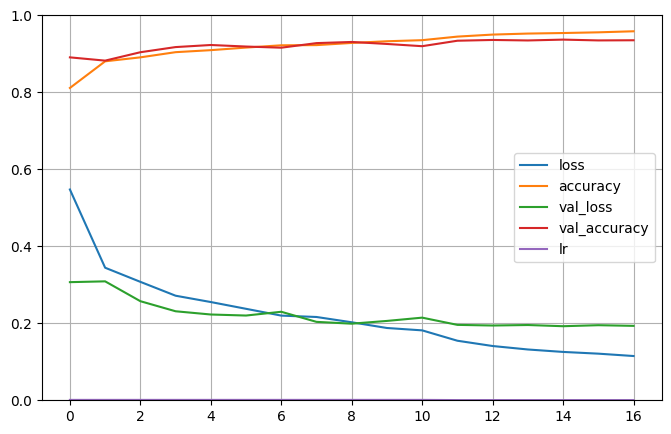

In [ ]:
# Використання згорткових нейронних мереж

thresh = 0.95
initial_learning_rate = 0.001

def on_epoch_end(epoch, logs):
    if logs["val_accuracy"] > thresh:
        print(f"\nReached {thresh}% validation accuracy. Stopping training!")
        model.stop_training = True

lambda_cb = LambdaCallback(on_epoch_end=on_epoch_end)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=2)


lr_schedule_exp = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=False)

def create_model():
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        Dropout(0.25, seed=0),
        Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25, seed=0),
        Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        Dropout(0.25, seed=0),
        Flatten(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.5, seed=0),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.5, seed=0),
        Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=initial_learning_rate),
        loss=losses.sparse_categorical_crossentropy,
        metrics=['accuracy']
    )
    return model

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255., x_test / 255.

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = create_model()
history = model.fit(x_train,
                  y_train,
                  epochs=17,
                  batch_size=32,
                  validation_data=(x_test, y_test),
                  callbacks=[lambda_cb, reduce_lr_cb]
                  )

results1 = model.evaluate(x_test, y_test)
results2 = model.evaluate(x_train, y_train)

print(f'Train results: {results2}')
print(f'Test results: {results1}')
print(f'Difference accuracy: {results2[1] - results1[1]}')

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_labels, target_names=class_names))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**Згорткова нейронна мережа з використанням донавчання та виділення ознак з VGG16**

x_train shape: (60000, 48, 48, 3)
x_test shape: (10000, 48, 48, 3)

Epoch 1/5
938/938 [==============================] - 1988s 2s/step - loss: 0.4956 - accuracy: 0.8235 - val_loss: 0.4588 - val_accuracy: 0.8427 - lr: 0.0100
Epoch 2/5
938/938 [==============================] - 1913s 2s/step - loss: 0.3888 - accuracy: 0.8565 - val_loss: 0.4421 - val_accuracy: 0.8500 - lr: 0.0100
Epoch 3/5
938/938 [==============================] - 1875s 2s/step - loss: 0.3611 - accuracy: 0.8679 - val_loss: 0.3883 - val_accuracy: 0.8573 - lr: 0.0100
Epoch 4/5
938/938 [==============================] - 1810s 2s/step - loss: 0.3444 - accuracy: 0.8729 - val_loss: 0.4223 - val_accuracy: 0.8516 - lr: 0.0100
Epoch 5/5
1875/1875 [==============================] - 1520s 811ms/step - loss: 0.3008 - accuracy: 0.8869
Train results: [0.3007524311542511, 0.886900007724762]
Test results: [0.3691527843475342, 0.8684999942779541]
Difference in accuracy: 0.01840001344680786
313/313 [==============================] - 254s 

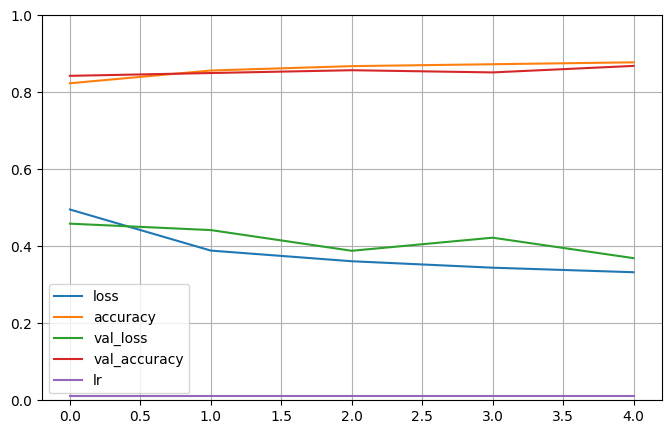

In [3]:
thresh = 0.91
initial_learning_rate = 0.01

def on_epoch_end(epoch, logs):
    if logs["val_accuracy"] > thresh:
        print(f"\nДосягнута точність на валідації {thresh}%. Зупинка навчання!")
        modified_model.stop_training = True

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False

set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

modified_model = models.Sequential([
    conv_base,
    Flatten(),
    Dense(512, activation="relu"),
    BatchNormalization(),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dense(10, activation="softmax")
])

modified_model.compile(
    optimizer=optimizers.RMSprop(learning_rate=initial_learning_rate),
    loss=losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

lambda_cb = LambdaCallback(on_epoch_end=on_epoch_end)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=2)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape([-1, 784])
x_train = np.dstack([x_train]*3)
x_train = x_train.reshape(-1, 28, 28, 3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_train = x_train.astype('float32') / 255.
print('x_train shape:', x_train.shape)

x_test = x_test.reshape([-1, 784])
x_test = np.dstack([x_test]*3)
x_test = x_test.reshape(-1, 28, 28, 3)
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_test = x_test.astype('float32') / 255.
print('x_test shape:', x_test.shape)
print()


history = modified_model.fit(x_train,
                          y_train,
                          epochs=5,
                          batch_size=64,
                          validation_data=(x_test, y_test),
                          callbacks=[lambda_cb, reduce_lr_cb]
                          )

results1 = modified_model.evaluate(x_test, y_test)
results2 = modified_model.evaluate(x_train, y_train)

print(f'Train results: {results2}')
print(f'Test results: {results1}')
print(f'Difference in accuracy: {results2[1] - results1[1]}')

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

y_pred = modified_model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_labels, target_names=class_names))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


**Висновок**

На жаль час генерації дуже дуж великий тому к-сть епох в згортковій мережі з використанням VGG16 була скорочена до 5, що відповіно не доло можливості наблизити точність до максимуму.

Та враховуючи навіть це я прийшла до висновку, що датасет fashion_mnist найкраще навчається зі звичайною згортковою нейронною мережею, відповідно з якою точність на тестовій вибірці становить 94,09%.

Щодо VGG16 - то навчання не було таким ефективним (87% в порівнянні зі звичайною згортковою мережею 94,09%)